## Sherlock (drama) script 기반 Q-A 구조 preprocessing

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
file_num = ['101', '102', '103', '201', '202', '203', '301', '302', '303', '401', '402', '403']

df = []

for num in file_num:
    name = '스크립트_txt/' + num + '.txt'
    script = pd.read_csv(name, sep='|', names=['sentence'])['sentence']
    SHERLOCK_idx = script[script.str.startswith('SHERLOCK')].index
    
    for idx in SHERLOCK_idx:
        upper = idx - 1
        while True:
            if ':' in script[upper] and len(script[upper][script[upper].find(':')+2:]) > 0:
                q = script[upper][script[upper].find(':')+2:]
                a = script[idx][script[idx].find(':')+2:]
                df.append([q, a])
                break
            else:
                upper -= 1
        
        
#         # answer만 split
#         a = re.split("([.?!’”]) ", a)
#         answer = [a[i-1] + a[i] for i in range(1, len(a), 2)] + [a[-1]]
#         answer = list(filter(None, answer))
#         for i in answer:
#             if len(i) > 2:df.append([q, i])
            
            
#         # 모든 조합 append
#         q = re.split("([.?!’”]) ", q)
#         question = [q[i-1] + q[i] for i in range(1, len(q), 2)] + [q[-1]]
#         question = list(filter(None, question))
#         a = re.split("([.?!’”]) ", a)
#         answer = [a[i-1] + a[i] for i in range(1, len(a), 2)] + [a[-1]]
#         answer = list(filter(None, answer))
        
#         for i in question:
#             for j in answer:
#                 if len(i) > 2 and len(j) > 2:df.append([i,j])

                    
df = pd.DataFrame(df, columns = ['question', 'answer'])

df['answer'] = df['answer'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
df['answer'] = df['answer'].apply(lambda x: re.sub(r'\[*\]', '', x))
df['answer'] = df['answer'].str.replace('♪', "")
df['answer'] = df['answer'].str.rstrip()

df['question'] = df['question'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
df['question'] = df['question'].apply(lambda x: re.sub(r'\[*\]', '', x))
df['question'] = df['question'].str.replace('♪', "")
df['question'] = df['question'].str.rstrip()

df.replace('', np.nan, inplace=True)
df.dropna(inplace=True, axis=0)
df['answer'] = df['answer'].apply(lambda x: x + '.' if x[-1] not in ['.', '?', '!', '”', '’'] else x)
df['question'] = df['question'].apply(lambda x: x + '.' if x[-1] not in ['.', '?', '!', '”', '’'] else x)

In [3]:
df

,question,answer
0,Who was the first?,How fresh?
1,"Just in. Sixty-seven, natural causes. He used ...",Fine. We’ll start with the riding crop.
2,"So, bad day, was it?",I need to know what bruises form in the next t...
3,"Listen, I was wondering: maybe later, when you...",Are you wearing lipstick? You weren’t wearing ...
4,"I, er, I refreshed it a bit.","Sorry, you were saying?"
...,...,...
4635,"Yeah, I’ll take care of it.","Thanks, Greg."
4636,You okay?,"I said I’d bring her home. I can’t, can I?"
4637,"Well, you gave her what she was looking for: c...",Is that good?
4638,Then you should have done better.,He did his best.


<AxesSubplot:>

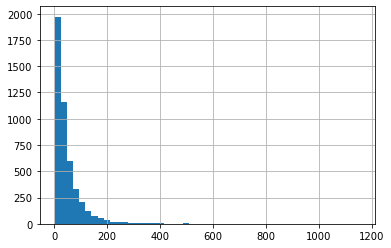

In [4]:
df['answer'].str.len().hist(bins=50)

<AxesSubplot:>

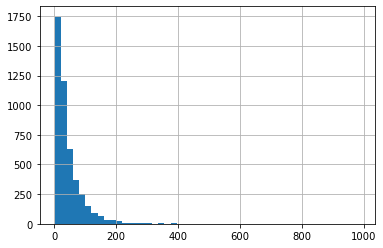

In [5]:
df['question'].str.len().hist(bins=50)

In [389]:
df.to_json('sherlock_origin.json.')

In [390]:
pd.read_json('sherlock_origin.json')

,question,answer
0,Who was the first?,How fresh?
1,"Just in. Sixty-seven, natural causes. He used ...",Fine. We’ll start with the riding crop.
2,"So, bad day, was it?",I need to know what bruises form in the next t...
3,"Listen, I was wondering: maybe later, when you...",Are you wearing lipstick? You weren’t wearing ...
4,"I, er, I refreshed it a bit.","Sorry, you were saying?"
...,...,...
4635,"Yeah, I’ll take care of it.","Thanks, Greg."
4636,You okay?,"I said I’d bring her home. I can’t, can I?"
4637,"Well, you gave her what she was looking for: c...",Is that good?
4638,Then you should have done better.,He did his best.


In [391]:
pd.read_json('sherlock_split_answer.json')

,question,answer
0,Who was the first?,How fresh?
1,"Just in. Sixty-seven, natural causes. He used ...",Fine.
2,"Just in. Sixty-seven, natural causes. He used ...",We’ll start with the riding crop.
3,"So, bad day, was it?",I need to know what bruises form in the next t...
4,"So, bad day, was it?",A man’s alibi depends on it.
...,...,...
7581,You okay?,I said I’d bring her home.
7582,You okay?,"I can’t, can I?"
7583,"Well, you gave her what she was looking for: c...",Is that good?
7584,Then you should have done better.,He did his best.


In [392]:
pd.read_json('sherlock_split_all.json')

,question,answer
0,Who was the first?,How fresh?
1,Just in.,Fine.
2,Just in.,We’ll start with the riding crop.
3,"Sixty-seven, natural causes.",Fine.
4,"Sixty-seven, natural causes.",We’ll start with the riding crop.
...,...,...
12223,You okay?,"I can’t, can I?"
12224,"Well, you gave her what she was looking for: c...",Is that good?
12225,Then you should have done better.,He did his best.
12226,...,"Oh, there’s Daddy!"


In [393]:
split_all = pd.read_json('sherlock_split_all.json')

<AxesSubplot:>

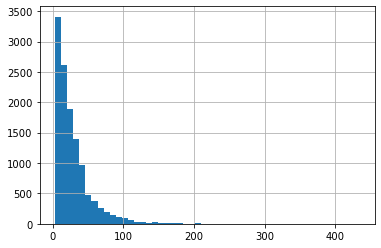

In [395]:
split_all['question'].str.len().hist(bins=50)

<AxesSubplot:>

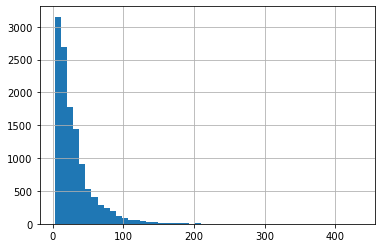

In [396]:
split_all['answer'].str.len().hist(bins=50)